# Kernel principal component analysis (PCA)

This notebook illustrate how to analyze IDP ensembles in IDPET via [kernel principal component analysis](https://en.wikipedia.org/wiki/Kernel_principal_component_analysis) implemented in [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.htm).

Kernel PCA is similar to PCA, but uses kernels to allow non-linear dimensionality reduction. This is particularly useful when we want to analyze angular features of IDP ensembles, such as their backbone φ and ψ angles.

We will analyze three drkN SH3 domain ensembles from PED, described in [\[Lincoff et al., 2020\]](https://www.nature.com/articles/s42004-020-0323-0).

## Load data from PED

In [1]:
import matplotlib.pyplot as plt
from dpet.ensemble import Ensemble
from dpet.ensemble_analysis import EnsembleAnalysis
from dpet.visualization import Visualization
from dpet.utils import set_verbosity


set_verbosity("INFO")  # Change verbosity level to show more information when performing the analysis.


ensembles = [
    Ensemble('PED00156e001', database='ped'), # Ensemble derived from the RANDOM pool in the paper.
    Ensemble('PED00157e001', database='ped'), # Ensemble derived from EXPERIMENTAL  pool in the paper.
    Ensemble('PED00158e001', database='ped')  # Mixture of the two pools, further refined against experimental data.
]

data_dir = None  # Add the path to a directory you wish in order to save the analysis
analysis = EnsembleAnalysis(ensembles, output_dir=data_dir)

analysis.load_trajectories() # load the trajectories which already downloaded from PED for upcoming analysis
visualization = Visualization(analysis=analysis) # make the visualization object for visualizing ensemble features  

Ensemble PED00156e001 already downloaded. Skipping.
File PED00156e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00156e001.
Ensemble PED00157e001 already downloaded. Skipping.
File PED00157e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00157e001.
Ensemble PED00158e001 already downloaded. Skipping.
File PED00158e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00158e001.
Loading trajectory for PED00156e001...
Loading trajectory for PED00157e001...
Loading trajectory for PED00158e001...


## Featurization

We will perform kernel PCA on the [φ and ψ angles](https://en.wikipedia.org/wiki/Ramachandran_plot) of the ensembles.

In [2]:
analysis.extract_features(featurization="phi_psi");

Performing feature extraction for Ensemble: PED00156e001.
Transformed ensemble shape: (100, 114)
Performing feature extraction for Ensemble: PED00157e001.
Transformed ensemble shape: (100, 114)
Performing feature extraction for Ensemble: PED00158e001.
Transformed ensemble shape: (88, 114)


## Dimensionality reduction

Actually perform kernel PCA. Since we are analyzing angular features, it is important to account for their periodic nature. To do so, set the `circular` argument to `True`.

In [3]:
analysis.reduce_features(method="kpca", circular=True, num_dim=10);

Concatenated featurized ensemble shape: (288, 114)
Concatenated featurized ensemble shape: (288, 114)
Reduced dimensionality ensemble shape: (100, 10)
Reduced dimensionality ensemble shape: (100, 10)
Reduced dimensionality ensemble shape: (88, 10)


## Visual analysis

Let's plot the conformations by projecting them onto the first two principal components (PCs) identified with kernel PCA.

The PED00156 maps differently from the others as it was generated via a knowledge-based method without reweighting againts any experimental restraint. Kernel PCA therefore capture the differences in backbone torsional angles of the ensembles. 

*Advanced usage note*: note that we are providing to the `pca_2d_landscapes` method a custom set of 4 matplotlib axes (1+number of ensembles) to show how you can have more control over the plot generated by the method.

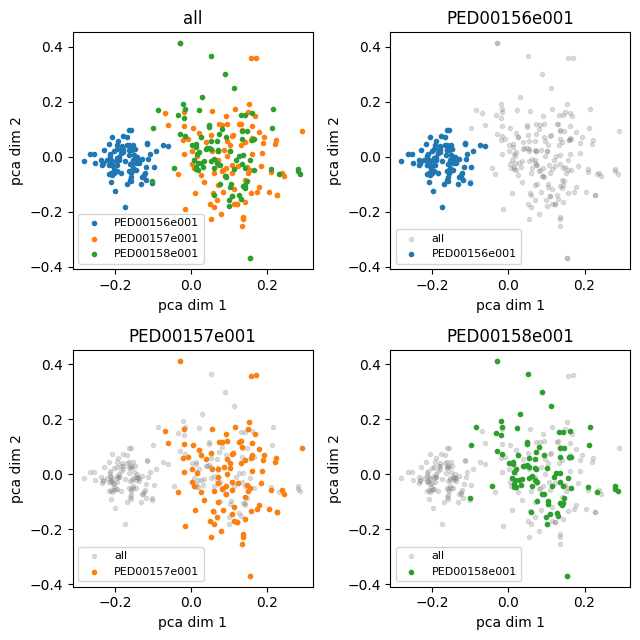

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(6.5, 6.5))  # 2x2 subplots to show (1 + number of ensembles) plots.

visualization.pca_2d_landscapes(
    dims=[0, 1],  # Show the first and second PCs.
    ax=ax         # Optionally provide a custom axes.
);

plt.tight_layout()

Let's also confirm this by visualizing the marginal distribution of the first PC by using an histogram.

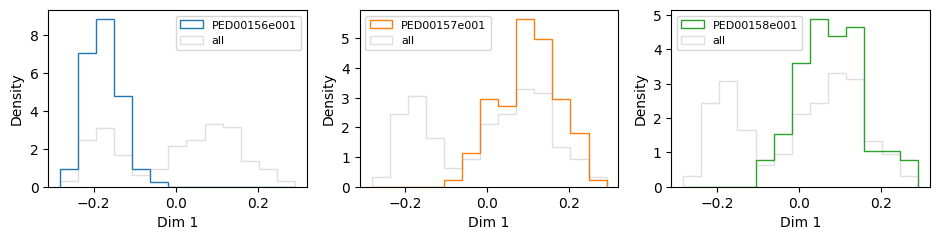

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(9.5, 2.5))  # 1x3 subplots to show (number of ensembles) plots.

visualization.pca_1d_histograms(
    dim=0,     # First PC.
    ax=ax,     # Again, provide custom axes.
    n_bins=14  # Number of histogram bins.
)

plt.tight_layout()